<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/Support_Vector_Machines(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Support Vector Machines(SVMs)


it is an extension of the support vector classifier that results from enlarging the feature space in a specific way using kernels.
The SVM algorithm outputs an optimal Hyperplane that categorizes new examples.

### Why Kerneling: 
most often our real data are not linearly seperable, kernels used here to extned there feature vector to higher dimensional space so that they can be classified.

in SVM the goal is to maximize the margin between from the HyperPlane
#### Hyperplane: 
it divides our data into two classes, on which is greater than zero to the right side of the hyper plane and the next class to the left side of the hyperplane:
#### Margin:
Margin is the distance from Hyperplane to the closest data point.
#### Support Vectors: 
these are the ones that define the shape,or position of the hyper plane. we have to be very careful while choosing, slightest change can cause a huge change in our hyperplane.
#### Why SVMs:
in fact perceptron and SVMs are doing the same thing, but with one difference:
in perceptrons, we have many classes of hyperplanes, But in Support vector machine we also have many, but the algorithm returns the one that has maximum margin, so that it won't be prune much to overfitting. 

## Kerneling:
Mapping data to a higher dimensional space is known as kernenling, we have different functions to do this, but the most important ones are

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
``` 

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.
"IBM course"


## Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.optimize as opt


## Loading the Cancer Data


The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |
<br>
<br>

In [70]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2022-06-03 12:32:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2022-06-03 12:32:56 (209 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [71]:
df = pd.read_csv("cell_samples.csv")
df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [72]:
cell = df[39:49]
cell

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
39,1091262,2,5,3,3,6,7,7,5,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
41,1099510,10,4,3,1,3,3,6,5,2,4
42,1100524,6,10,10,2,8,10,7,3,3,4
43,1102573,5,6,5,6,10,1,3,1,1,4
44,1103608,10,10,10,4,8,1,8,10,1,4
45,1103722,1,1,1,1,2,1,2,1,2,2
46,1105257,3,7,7,4,4,9,4,8,1,4
47,1105524,1,1,1,1,2,1,2,1,1,2
48,1106095,4,1,1,3,2,1,3,1,1,2


Now, our task here is to extract the pattern from data and divide them into two classes.
each column represents a feature of a cell which contributes to being in Bengin class or in Malignant class.


the data is divided into two classes based on the cells characterastic, 
* Bengin(Value = 2), this means its not dangerous 
* Malignant (value =4), it is dangerous and causes cancer


Here, we will look and plot different features belonging two classes to find the one which has more weights in deciding to which category it mights belong to.


| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |
<br>
<br>

### Now Lets do the Scatter plot for each feature vector, to look if we can interpret any insight and look at their relationship to the both of the classes.

	Marginal adhesion vs Single epithelial cell size

## **Marginal adhesion vs Single epithelial cell size**


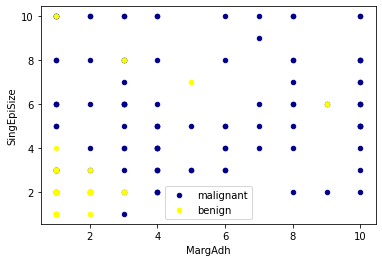

In [73]:
ax = df[df['Class'] == 4][0:100].plot(kind='scatter', x='MargAdh', y='SingEpiSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:100].plot(kind='scatter', x='MargAdh', y='SingEpiSize', color='Yellow', label='benign', ax=ax);
plt.show()

in Bottom left of the above graph there is nmore chance of being in Benign category and the other region we can see more of Malignant class.
we can estimate that as MargAdh and Single epithelial cell size increases the, they are most likely to be in Malignant class.

	
## **Clump thickness vs	Uniformity of cell size**

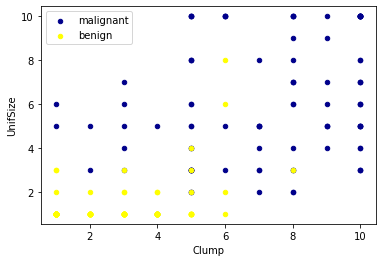

In [74]:
ax = df[df['Class'] == 4][0:100].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:100].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## **Mitoses vs Uniformity of cell size**

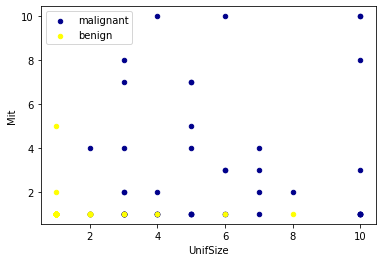

In [75]:

ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='UnifSize', y='Mit', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter',x='UnifSize', y='Mit', color='Yellow', label='benign', ax=ax);
plt.show()

from above scatter plot we can see a strong relation ship between the two features as Mitosis and Uniformity of Cell Size increases, there is more chance of falling in the Malignant category, but mitosis does not look contribute much here

## **Bland chromatin vs Bare nuclei**

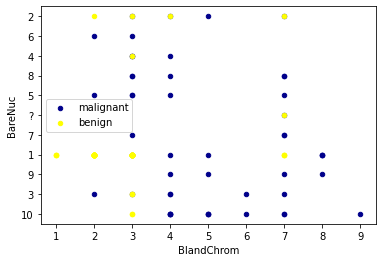

In [76]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='BlandChrom', y='BareNuc', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter',x='BlandChrom', y='BareNuc', color='Yellow', label='benign', ax=ax);
plt.show()

from above scatter plot, we can see raltively as the BlandChrom increases, the chances of falling in Malignant category also increases, but here is not a strong relation ship between these two features, and also as we can see they are linearly seperable unless we go for higher dimensional feature transformation.

## Note
the above scatter plots shows that none of the above figures is linearly seperable unless we do the feature transformation.
this is one of the main advantage of SVM which it guarantees that if data is seperable, it will return the one with maximum margin.

# Data PreProcessing

In [77]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

from above trable we can see that the BareNuc contains some non_numeric value. in the above also we could see in row 40, there was a non numeircal value.
Lets drop those row which contain non_numerical values

In [78]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Now,every thing is cleaned up

In [79]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Lets change our feature data to their numeric values and assign it to X as later we will use it for training purpose

In [80]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:10]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]])

### Now, coming to our dependent varible, it can take only two values, either(==2, Belongs to the Bengin), or (==4, belongs to Malignant)

In [81]:
dep_feature = df['Class']
Y = np.asarray(dep_feature)
Y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

# Train_Test Splitting:
Now, it is time for splitting our data into two sets, for training the model and the other for testing of our model.
sklearn do this for Us by using the train_test_split method which takes as input both the independent features and dependent varible, we can also decide how much percentage of our data we want to be used for testing, here we can see by assigning to 0.2, it means 20 percent of our data will be used for testing (Untouchable during training process).



In [82]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


(546,9) means that we have 546 rows and 9 columns, which states that there is 546 set of data with 9 features (learnable) for training, which our model extracts patterns from these features to decide to which class they belongs to.

# Modeling (SVM with Scikit-learn)
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function)

source: "IBM Coursera"

## SVC
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.  From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.


In [83]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train, Y_train) 


SVC()

### Predicting
Now, as our model trained, we can test with our test data

In [84]:
y_predicted = model.predict(X_test)
y_predicted[0:10]

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2])

# Evaluation.
**Compute confusion matrix to evaluate the accuracy of a classification**.
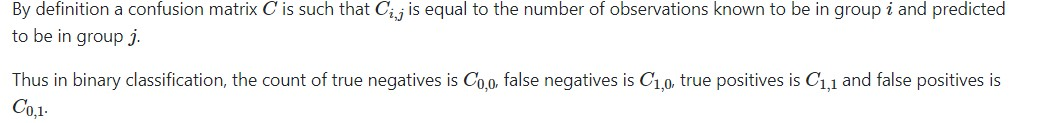
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 
The confusion matrix was utilized for the performance evaluations of the methods used after the classification.

**sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)**.




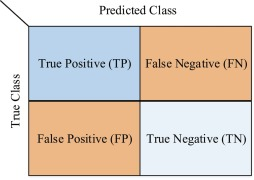

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [86]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


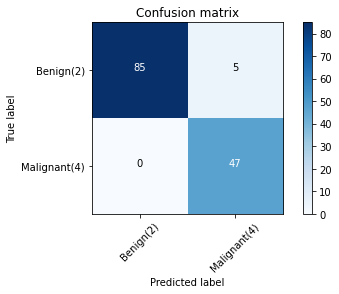

In [87]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,y_predicted, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, y_predicted))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

### F1_score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is.

F1 = 2 * (precision * recall) / (precision + recall).

**Precision**.

Precision is defined as the fraction of relevant instances among all retrieved instances.
What proportion of positive identifications was actually correct ?



**recall**

The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples.

In [88]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_predicted, average='weighted') 

0.9639038982104676

## Lets Use Sigmoid Kernel methode

In [98]:
from sklearn import svm
model = svm.SVC(kernel='sigmoid')
model.fit(X_train, Y_train) 

SVC(kernel='sigmoid')

In [99]:
y_predicted = model.predict(X_test)
y_predicted[0:10]

array([2, 2, 2, 2, 2, 4, 4, 2, 2, 4])

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [101]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

Confusion matrix, without normalization
[[54 36]
 [47  0]]


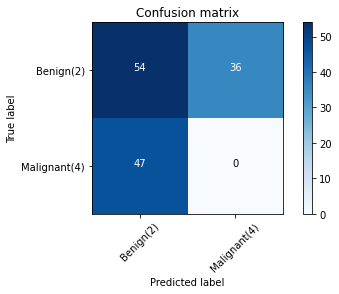

In [102]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,y_predicted, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, y_predicted))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [103]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_predicted, average='weighted') 

0.3714602361753353

## Conclusion:
we were able to do classification using Support vector machines and tested with two different evaluation matrices, and also at the end we tried the sigmoid kernel also, which did not give a desirable result, it means we have to look at our datasets and based on that we can choose the kernel functions that give best result.

sources:

* https://www.coursera.org/learn/machine-learning-with-python/home/week/3.

* https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall.

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html.

* https://www.youtube.com/watch?v=RwF1esLCG4U&ab_channel=KilianWeinberger

Books:
* an introduction to statistical learning.
* pattern recognition and machine learning